# Wine Case Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [293]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [294]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [295]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine_00 = pd.read_csv('./Wine_Hier00.csv')
df_Wine_01 = pd.read_csv('./Wine_Hier01.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [296]:
df_Wine_00.shape

(3304, 25)

In [297]:
df_Wine_00 = df_Wine_00.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_00.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [298]:
df_Wine_01 = df_Wine_01.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_01.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [299]:
df_Wine_01.shape

(3304, 25)

In [300]:
df_Wine_01.shape

(3304, 25)

In [301]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine_00.drop(df_Wine_00.tail(n).index, inplace = True)
df_Wine_01.drop(df_Wine_01.tail(n).index, inplace = True)

In [302]:
# Review_Year
# Convert Review_Year from float to int
df_Wine_00['Review_Year'] = df_Wine_00['Review_Year'].astype(int)
df_Wine_01['Review_Year'] = df_Wine_01['Review_Year'].astype(int)

In [303]:
df_GeoCache.shape

(1228, 8)

In [304]:
df_Flag.shape

(19, 3)

In [305]:
df_Wine_00.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,Latitude,Longitude,altitude
1143,2009,42,2007,97.0,115,Clos des Papes,Châteauneuf-du-Pape,Red,Châteauneuf-du-Pape,NaN,...,2010.0,2030.0,"Absolutely stunning, with a deep well of crème...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
2734,1993,32,1989,94.0,38,Beni di Batasiolo,Barolo La Corda della Briccolina,Red,Blend,Nebbiolo,...,1993.0,NaN,"Totally disarming, a gorgeous array of rose pe...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
2701,1994,99,1991,90.0,19,Rochioli,Pinot Noir Russian River Valley,Red,Pinot Noir,NaN,...,1994.0,2003.0,"Bright, ripe and spicy with pretty floral, che...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
213,2018,14,2016,98.0,98,Warre,Vintage Port,Dessert & Fortified,Blend,Port Blend Red,...,2035.0,2055.0,"Gorgeous, with warm plum reduction and gently ...",Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0
32,2020,33,2017,91.0,22,Ken Wright,Pinot Noir Willamette Valley,Red,Pinot Noir,NaN,...,2020.0,2026.0,"Sleek and elegantly rich, with a vibrant backb...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
520,2015,20,2013,92.0,22,Meiomi,Pinot Noir Monterey-Sonoma-Santa Barbara Counties,Red,Pinot Noir,NaN,...,2015.0,2020.0,"Rich yet medium-weight, offering an exciting i...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1278,2008,77,NV,91.0,38,Duval-Leroy,Brut Champagne,Sparkling,Champagne,NaN,...,2008.0,2010.0,"This rich, sumptuous bubbly is marked by clove...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
1293,2008,92,2006,90.0,30,Domaine Gilles Noblet,Pouilly-Fuissé,White,Chardonnay,NaN,...,2008.0,2012.0,"Rich and concentrated, showing lanolin, peach ...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
967,2011,66,2008,93.0,48,Leviathan,California,Red,Blend,"Cabernet Sauvignon, Merlot, Syrah and Cabernet...",...,2011.0,2022.0,"Starts understated, building depth and dimensi...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
2505,1995,4,1992,96.0,30,Fonseca,Vintage Port,Dessert & Fortified,Blend,Port Blend Red,...,2005.0,NaN,The best Fonseca since the perfect 1977. Inten...,Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0


## Pivot on Address

### Hierarchy 00

In [306]:
# Count by Wine Style by Address - All Years
df_Count_WS_All_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_All_00.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
43,White,USA,39.783730,-100.445882,347
8,Red,Argentina,-34.996496,-64.967282,55
16,Red,Italy,42.638426,12.674297,435
44,White,Ukraine,49.487197,31.271832,1
23,Red,Uruguay,-32.875555,-56.020153,2
27,Sparkling,Italy,42.638426,12.674297,3
28,Sparkling,Spain,39.326068,-4.837979,3
15,Red,Israel,31.531311,34.866765,6
30,White,Argentina,-34.996496,-64.967282,2
3,Dessert & Fortified,Hungary,47.181759,19.506094,9


In [307]:
# Count by Wine Style - By Review Year
df_Count_WS_ByYear_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Review_Year', 'Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_ByYear_00.sample(10)

,Review_Year,Wine_Style,Address,Latitude,Longitude,Count
431,2013,Red,Greece,38.995368,21.987713,1
619,2020,White,France,46.603354,1.888333,5
313,2008,Dessert & Fortified,France,46.603354,1.888333,1
498,2016,Red,Argentina,-34.996496,-64.967282,3
175,2000,White,Germany,51.083420,10.423447,2
335,2009,Red,Argentina,-34.996496,-64.967282,2
209,2002,White,Italy,42.638426,12.674297,4
12,1988,White,USA,39.783730,-100.445882,10
586,2019,Rosé | Rosado,France,46.603354,1.888333,1
169,2000,Red,Spain,39.326068,-4.837979,4


### Hierarchy 01

In [308]:
# Count by Wine Style - All Years
df_Count_All_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_All_01.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
36,Red,"Corsica, France",42.188090,9.068414,1
113,White,"Casablanca Valley, Chile",-33.320586,-71.410076,1
15,Red,Australia,-24.776109,134.755000,2
107,White,"Burgundy, France",47.278087,4.222486,86
51,Red,"Malpica de Tajo, Spain",39.894620,-4.548450,3
79,Red,"Umbria, Italy",42.965916,12.490236,2
32,Red,"Catalonia | Catalunya, Spain",41.396081,2.187969,19
34,Red,"Choapa Valley, Chile",-31.728012,-71.208068,1
136,White,New Zealand,-41.500083,172.834408,1
29,Red,"Casablanca Valley, Chile",-33.320586,-71.410076,1


In [309]:
# Count by Wine Style - By Review Year
df_Count_ByYear_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Review_Year', 'Address', 'Latitude', 'Longitude'])['Score'].count()}).reset_index()
df_Count_ByYear_01.sample(10)

,Review_Year,Address,Latitude,Longitude,Count
47,1991,"Burgundy, France",47.278087,4.222486,16
25,1989,"South Australia, Australia",-30.534366,135.630121,2
522,2010,"Bordeaux, France",44.841225,-0.580036,1
713,2015,"Galicia, Spain",42.619460,-7.863112,1
895,2019,"Trentino,Alto Adige, Italy",46.102817,11.129543,1
538,2010,"Maipo Valley, Chile",-33.732865,-70.781236,1
870,2019,"Central Otago, New Zealand",-45.129986,169.524882,1
863,2019,"Burgundy, France",47.278087,4.222486,3
515,2009,"Tuscany, Italy",43.458654,11.138920,15
901,2020,"Alsace, France",48.249176,7.407470,1


## Map Results: World Map
Plot count results at Hierarchy 00 on world map.
### Import Shapefile
* See [World Map Units, 1:10 million (2012)](https://geo.nyu.edu/catalog/stanford-gj285pj7891) from the NYU Spatial Data Repository.
* See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [310]:
world_map = gpd.read_file('./shapefiles/world/gj285pj7891.shp')

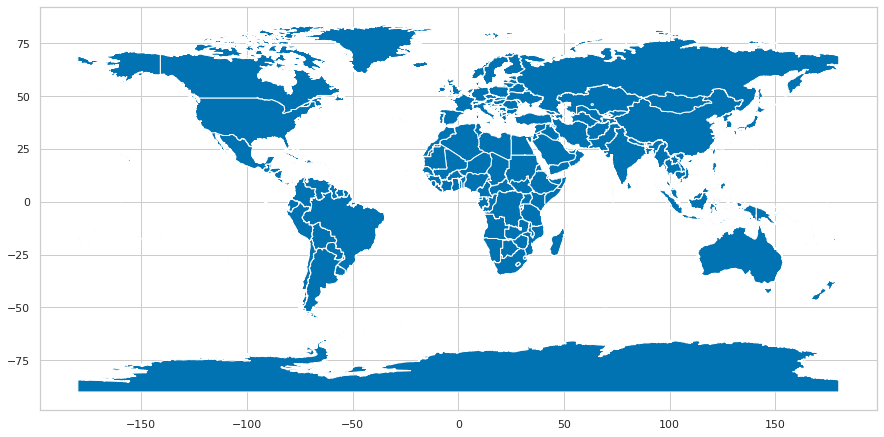

In [311]:
fig, ax = plt.subplots(figsize = (15, 15))
world_map.plot(ax = ax)

In [312]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

## Plot Counts by Hierarchy 00 (Country) by Wine Style

In [313]:
def count_style_country(wine_style, color):    
    df = df_Count_WS_All_00[(df_Count_WS_All_00.Wine_Style == wine_style)]

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (15, 15))
    
    world_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'], color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by Country\nReview Years 1988-2020')
    
    plt.savefig('./images/count_scores_by_country_' + wine_style + '.png')

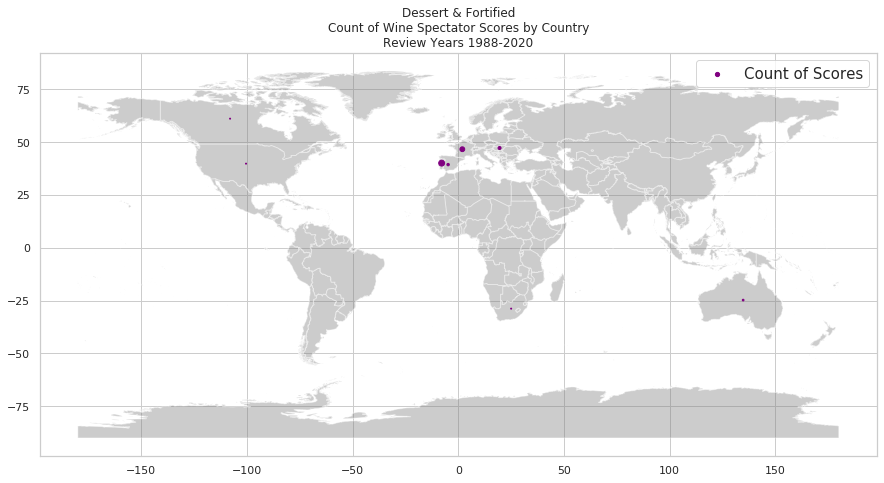

In [314]:
count_style_country('Dessert & Fortified', 'purple')

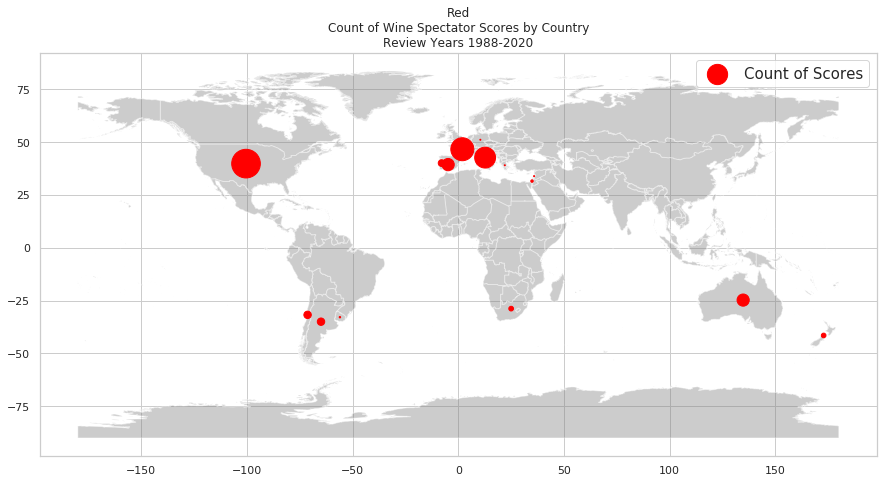

In [315]:
count_style_country('Red', 'red')

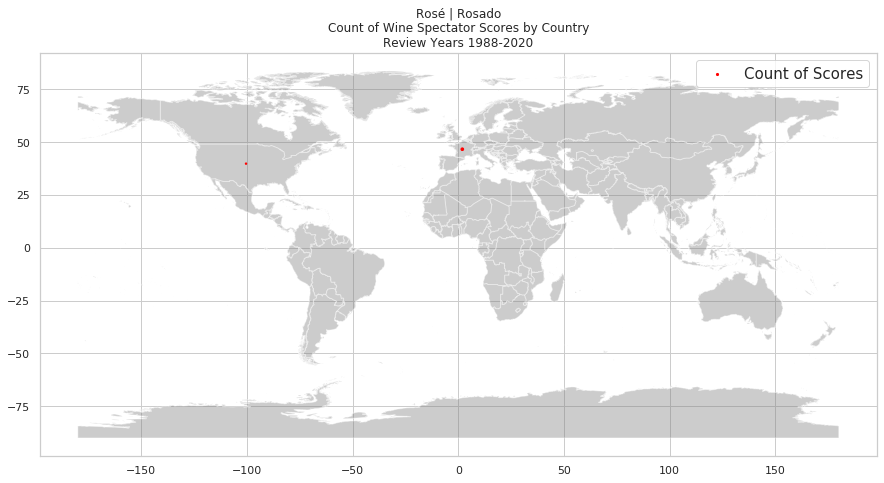

In [316]:
count_style_country('Rosé | Rosado', 'red')

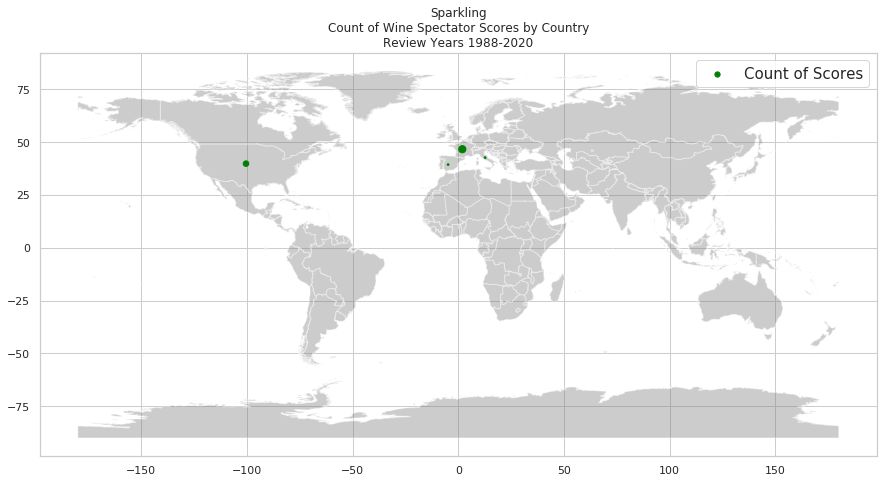

In [317]:
count_style_country('Sparkling', 'green')

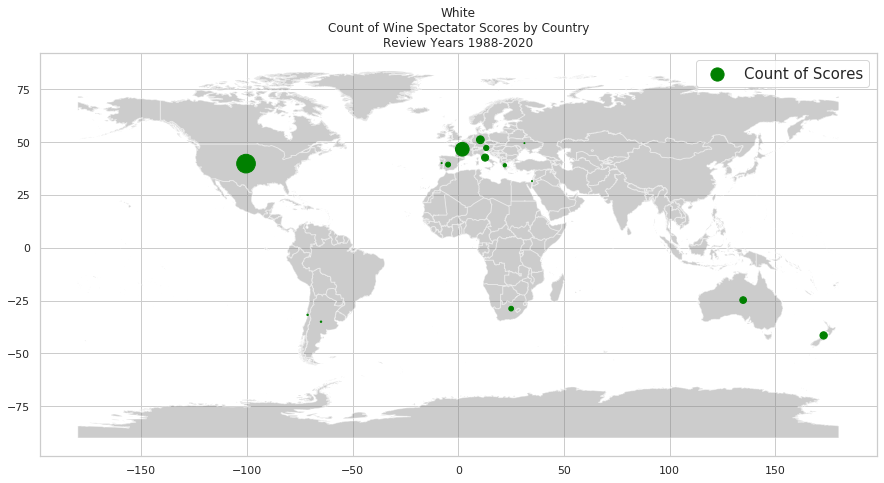

In [324]:
count_style_country('White', 'green')

## Plot Counts by Hierarchy 01 (within Country)

In [325]:
# import country maps
usa_map = gpd.read_file('./shapefiles/USA/vw421bb8115.shp')
france_map = gpd.read_file('./shapefiles/France/ym781wr7170.shp')
italy_map = gpd.read_file('./shapefiles/Italy/bb489fv3314.shp')

In [326]:
def count_style_subcountry(wine_style, country):    
    df = df_Count_All_01[
        (df_Count_All_01.Wine_Style == wine_style) &
        (df_Count_All_01.Address.str.contains(country) == True)
    ]
    
    if country == 'USA':
        country_map = usa_map
        bounds = 'State'
    elif country == 'France':
        country_map = france_map
        bounds = 'First-Level Administrative Division'
    elif country == 'Italy':
        country_map = italy_map
        bounds = 'First-Level Administrative Division'
    else:
        print('select USA, France, or Italy as country')
        
    if wine_style == 'Dessert & Fortified':
        color = 'purple'
    elif wine_style == 'Red':
        color = 'red'
    elif wine_style == 'Rosé | Rosado':
        color = 'red'
    elif wine_style == 'Sparkling':
        color = 'green'
    elif wine_style == 'White':
        color = 'green'
    

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (10, 10))
    
    if country == 'USA':
        ax.set(xlim = (-130, -60), ylim = (20, 55))
    
    country_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'] * 3, color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by ' + bounds +'\nReview Years 1988-2020')
    
    fig.savefig('./images/count_scores_by_' + country + '_' + wine_style + '.png')

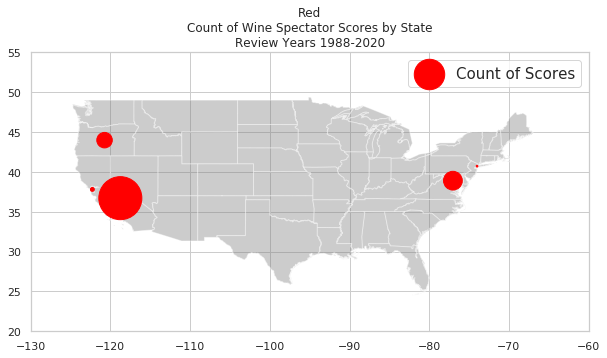

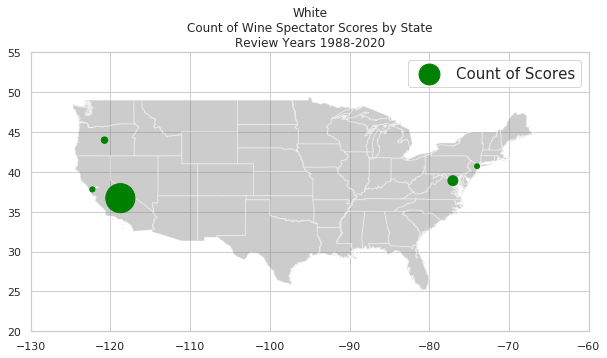

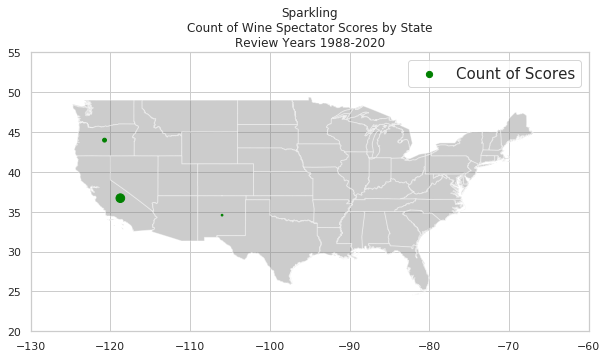

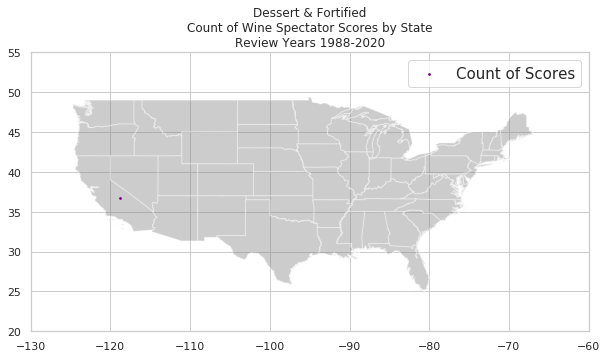

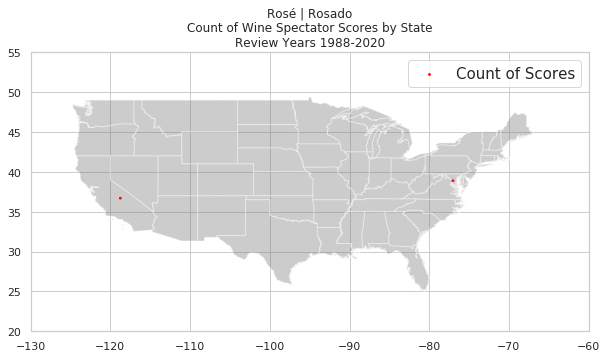

In [327]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'USA')

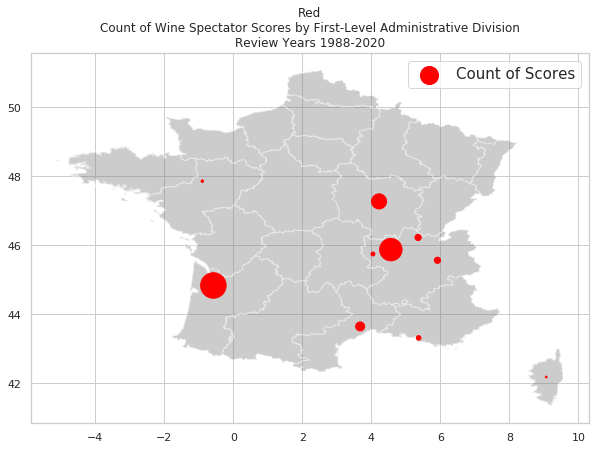

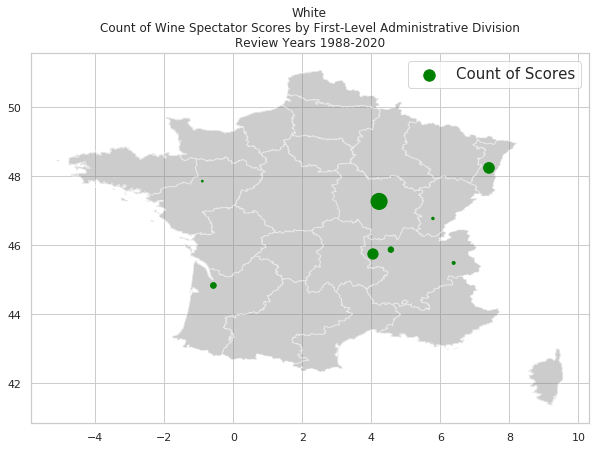

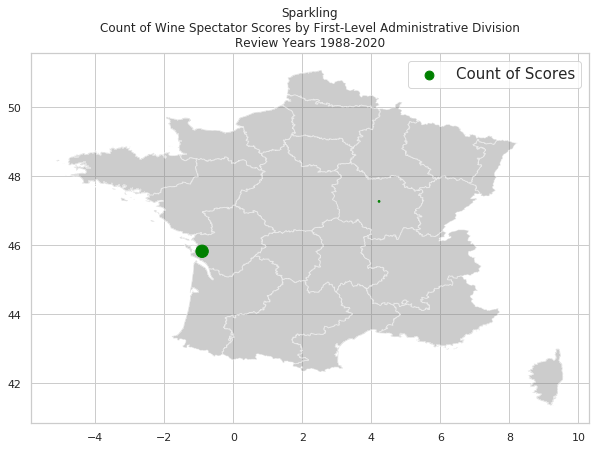

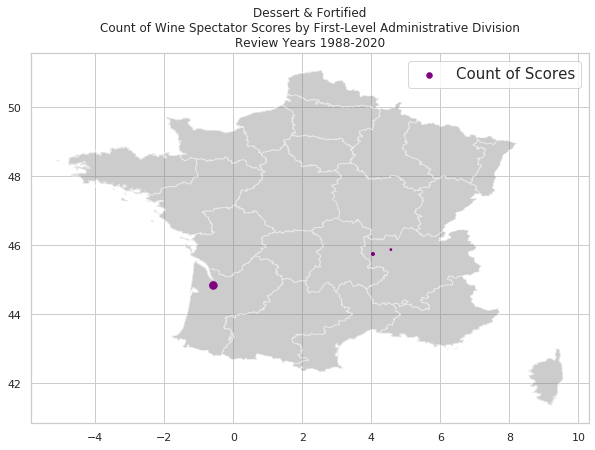

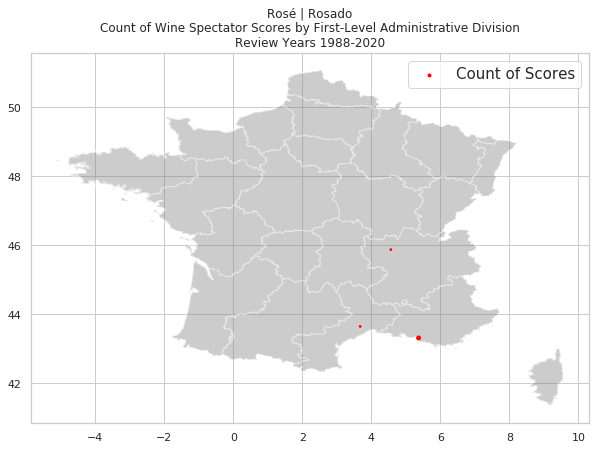

In [328]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'France')

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.


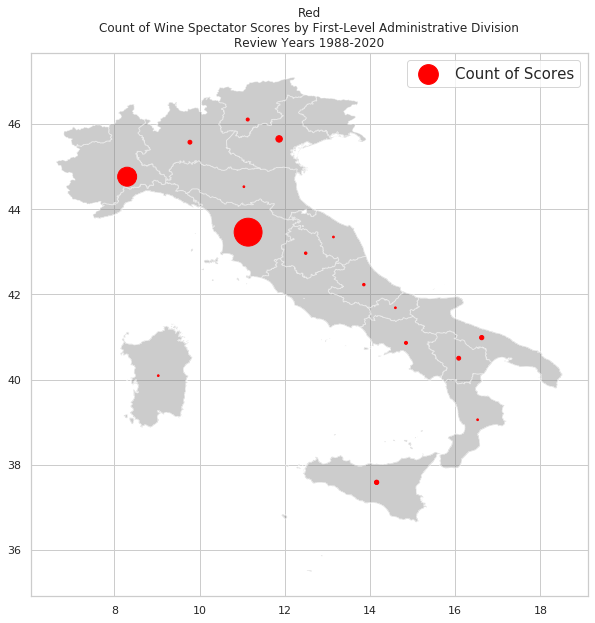

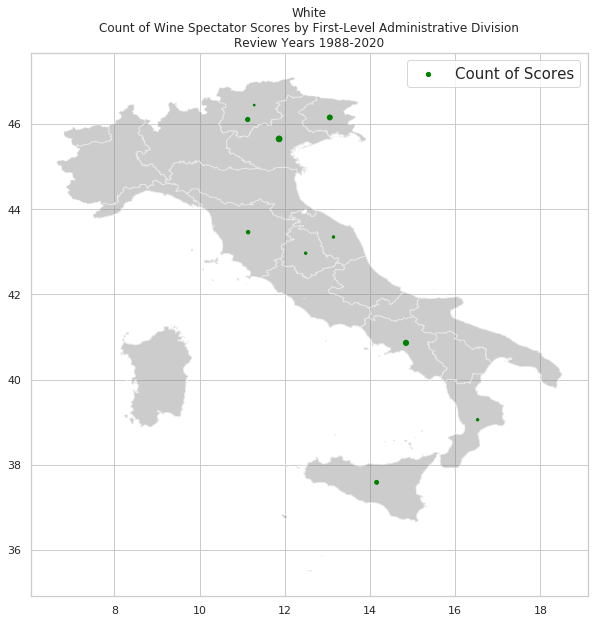

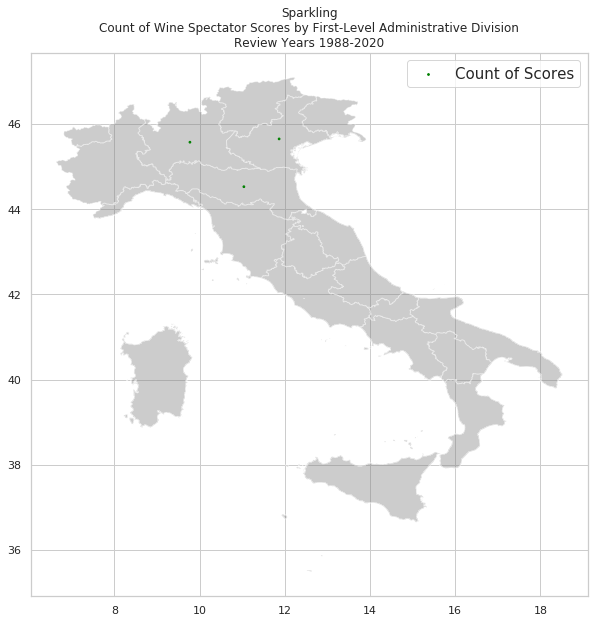

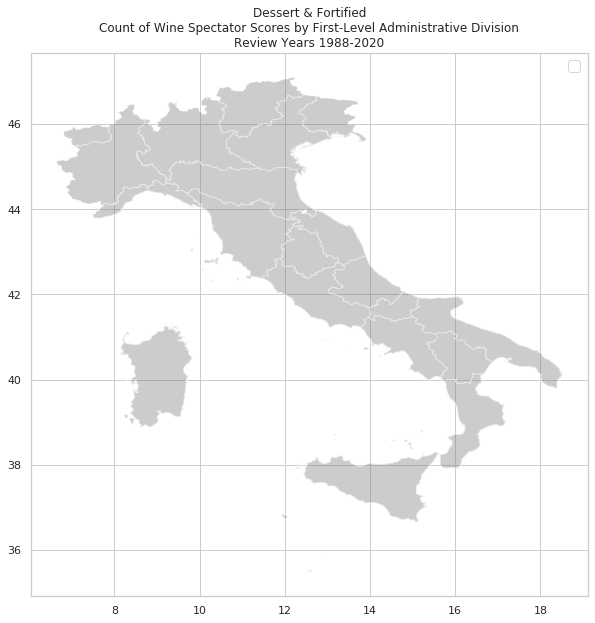

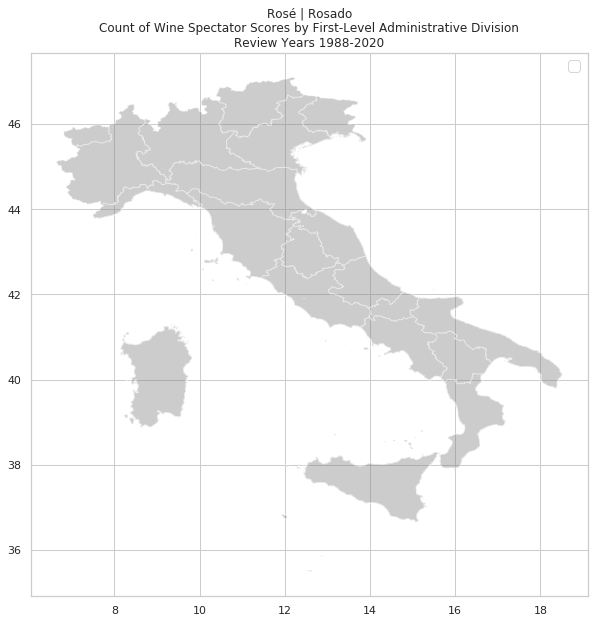

In [329]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'Italy')